In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as sps
from IPython.display import display
import os
from tqdm import tqdm

In [2]:
from qfin.models import *

In [3]:
models = BlackScholesModel, HestonModel, VarianceGammaModel, SVJModel, SVCJModel, CGMYModel, MertonModel
models = [model.name for model in models]

In [13]:
DIRECTORY = "20210721_162954"

In [14]:
bounds_dict = {
    
    # SVCJ DeltaHedge
    'PNL__SVCJ__DeltaHedge__BULLISH__4000__30': (-1, 1),
    'PNL__SVCJ__DeltaHedge__CALM__8000__30': (-1, 1),
    'PNL__SVCJ__DeltaHedge__COVID__10000__30': (-1, 1),

    # SVCJ DeltaGammaHedge
    'PNL__SVCJ__DeltaGammaHedge__BULLISH__4000__30': (-1, 1),
    'PNL__SVCJ__DeltaGammaHedge__CALM__8000__30': (-1, 1),
    'PNL__SVCJ__DeltaGammaHedge__COVID__10000__30': (-1, 1),

    # SVCJ DeltaGammaHedge
    'PNL__SVCJ__DeltaVegaHedge__BULLISH__4000__30': (-1, 1),
    'PNL__SVCJ__DeltaVegaHedge__CALM__8000__30': (-1, 1),
    'PNL__SVCJ__DeltaVegaHedge__COVID__10000__30': (-1, 1),

    # SVCJ MinimumVarianceHedge
    'PNL__SVCJ__MinimumVarianceHedge__BULLISH__4000__30': (-2, 2),
    'PNL__SVCJ__MinimumVarianceHedge__CALM__8000__30': (-2, 2),
    'PNL__SVCJ__MinimumVarianceHedge__COVID__10000__30': (-2, 2),

    # KDE DeltaHedge
    'PNL__KDE__DeltaHedge__BULLISH__4000__30': (-1.5, 1.5),
    'PNL__KDE__DeltaHedge__CALM__8000__30': (-1.5, 1.5),
    'PNL__KDE__DeltaHedge__COVID__10000__30': (-1.5, 1.5),

    # KDE DeltaGammaHedge
    'PNL__KDE__DeltaGammaHedge__BULLISH__4000__30': (-1.5, 1.5),
    'PNL__KDE__DeltaGammaHedge__CALM__8000__30': (-1.5, 1.5),
    'PNL__KDE__DeltaGammaHedge__COVID__10000__30': (-1.5, 1.5),

    # KDE DeltaGammaHedge
    'PNL__KDE__DeltaVegaHedge__BULLISH__4000__30': (-1.5, 1.5),
    'PNL__KDE__DeltaVegaHedge__CALM__8000__30': (-1.5, 1.5),
    'PNL__KDE__DeltaVegaHedge__COVID__10000__30': (-1.5, 1.5),

    # KDE MinimumVarianceHedge
    'PNL__KDE__MinimumVarianceHedge__BULLISH__4000__30': (-2, 2),
    'PNL__KDE__MinimumVarianceHedge__CALM__8000__30': (-2, 2),
    'PNL__KDE__MinimumVarianceHedge__COVID__10000__30': (-2, 2),

}

In [34]:
def plot_hedge_boxplot(paths, models, hedge, period, strike, maturity, price, bounds=(-2, 2)):

    pnls = []
    columns = []

    for model in models:

        fname = f'PNL__{paths}__{model}__{hedge}__{period}__{strike}__{maturity}__100000.csv'
        path = f'_output/hedges/pnl/{DIRECTORY}/{fname}'
                
        if not os.path.exists(path):
            continue

        pnl = pd.read_csv(path, header=None)[0].to_numpy()
        pnl = np.array([x for x in pnl if not np.isnan(x)])
        pnls.append(pnl)
        columns += [model]

    size = np.min([len(pnl) for pnl in pnls])
    pnls = [pnl[:size] for pnl in pnls]
    pnls = np.array(pnls)
    df = pd.DataFrame(pnls.T, columns=columns)
    df = df[~df.isna().any(axis=1)]
    df /= price

    fname = f"PNL__{paths}__{hedge}__{period}__{strike}__{maturity}.csv"
    path = f"_output/hedges/figures/{DIRECTORY}/{fname}"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    df.describe().T.to_csv(path)

    fig, ax = plt.subplots(figsize=(20, 5))
    
    df.boxplot(showfliers=False, ax=ax)
    ax.grid(False)
    
    fname = f"PNL__BOXPLOT__{paths}__{hedge}__{period}__{strike}__{maturity}.pdf"
    path = f"_output/hedges/figures/{DIRECTORY}/{fname}"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    fig.savefig(path)


 42%|████▏     | 20/48 [00:37<00:48,  1.74s/it]<ipython-input-34-813d79d44891>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 5))
100%|██████████| 48/48 [01:38<00:00,  2.04s/it]


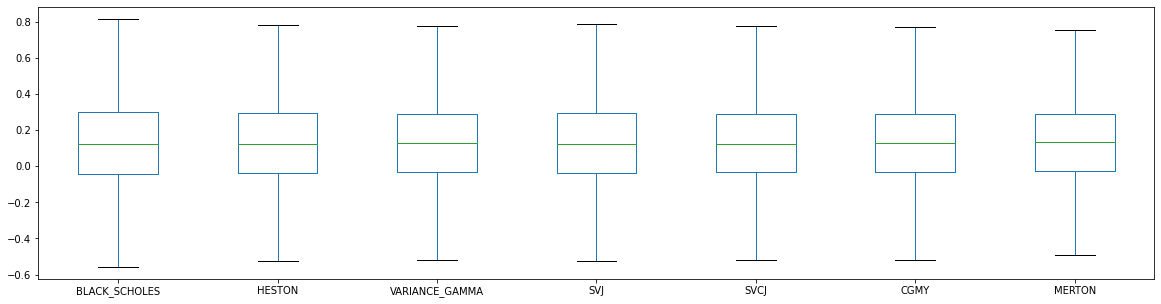

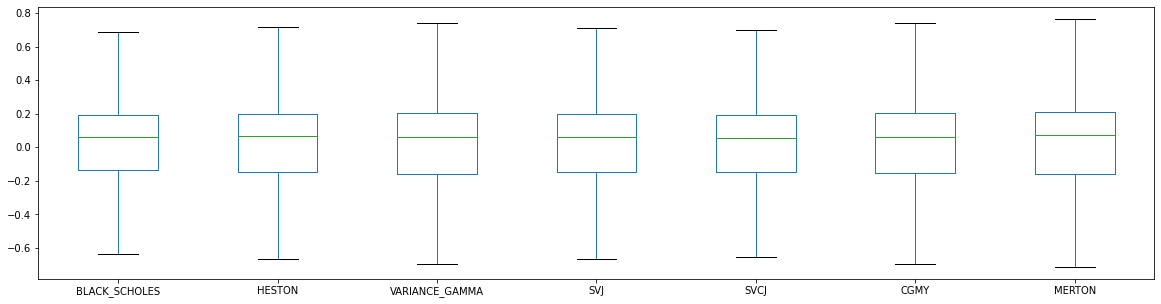

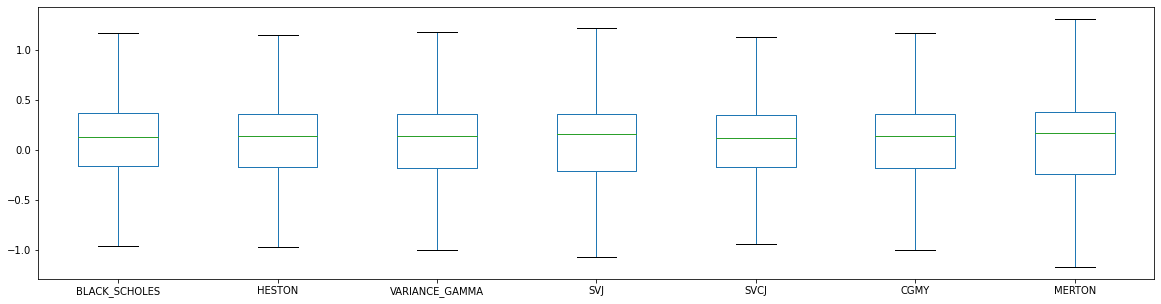

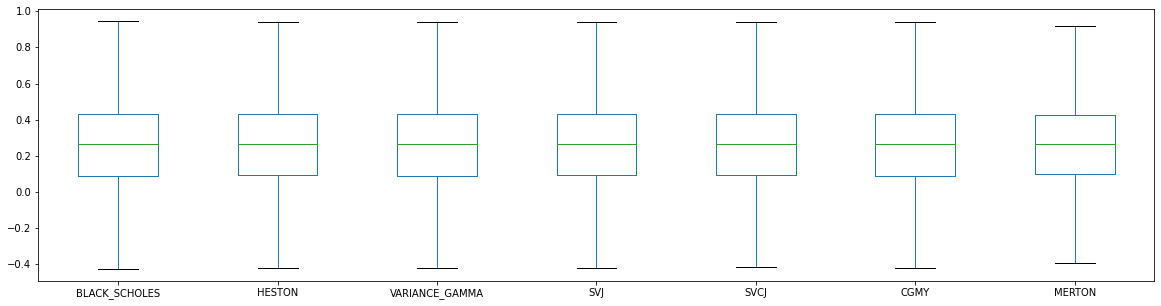

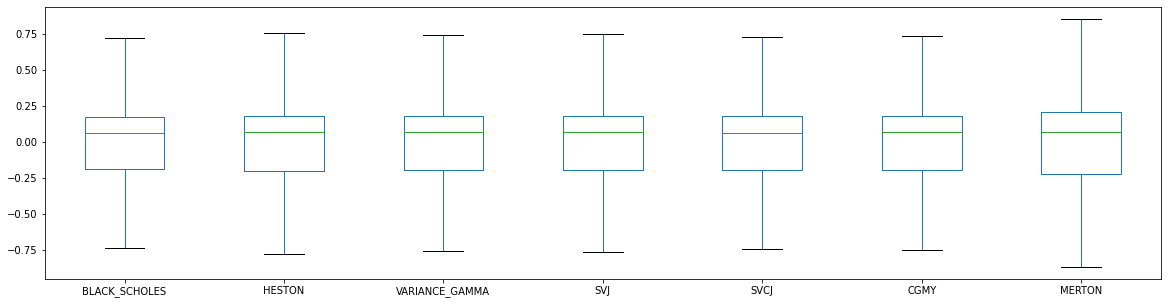

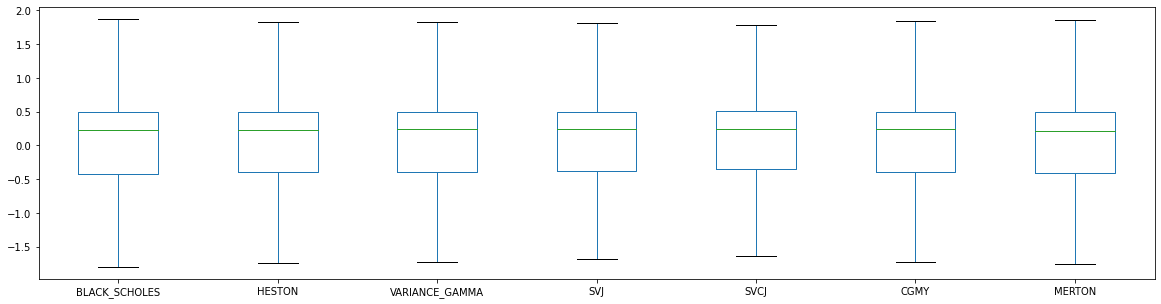

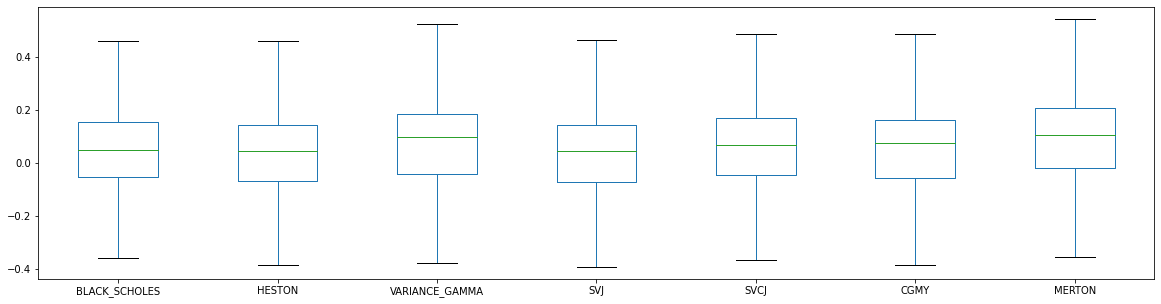

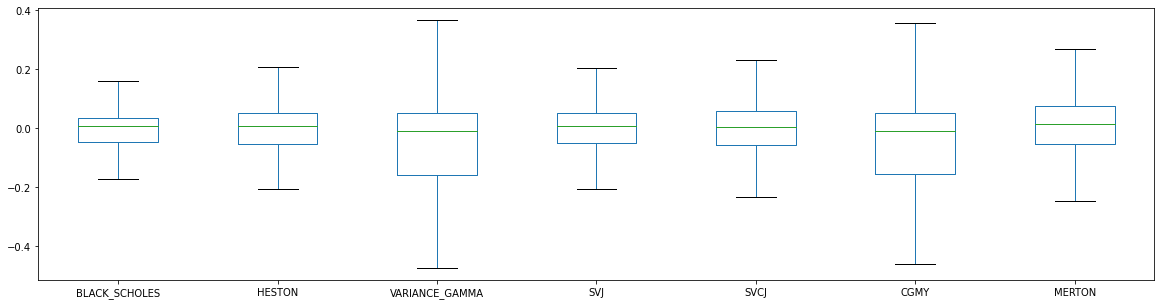

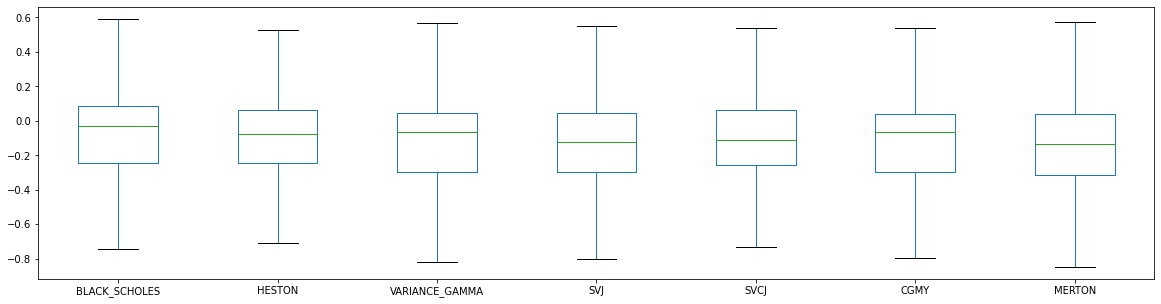

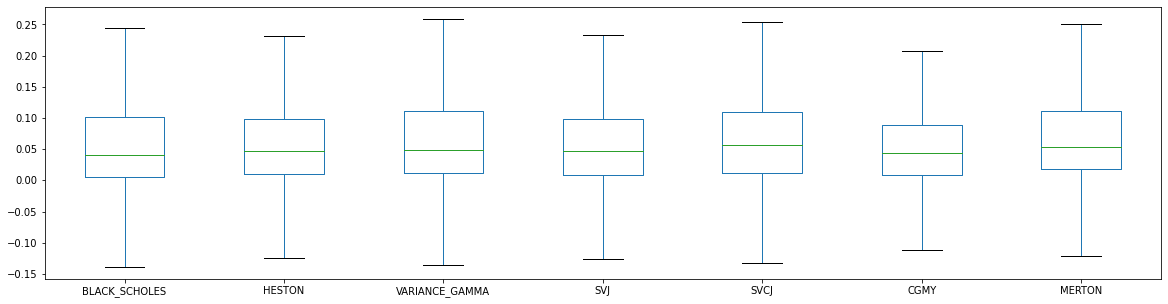

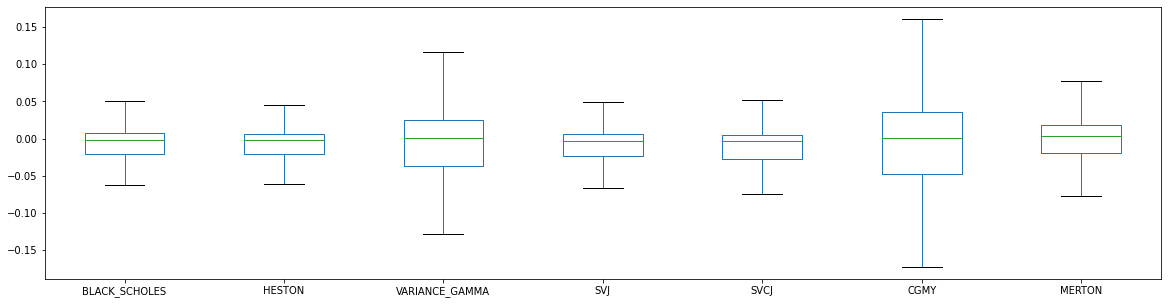

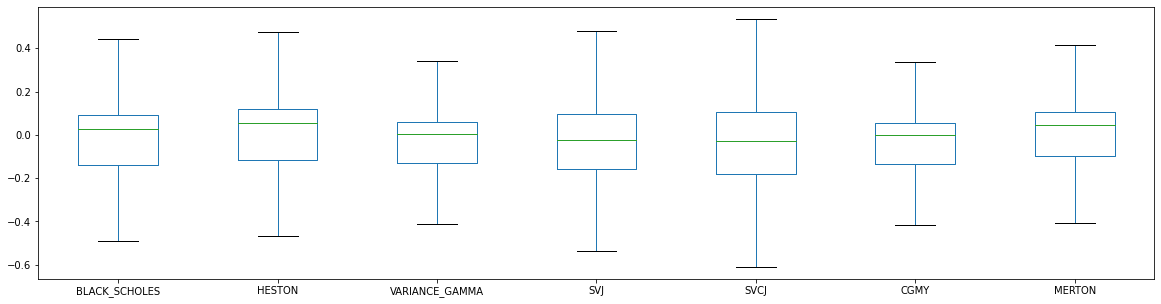

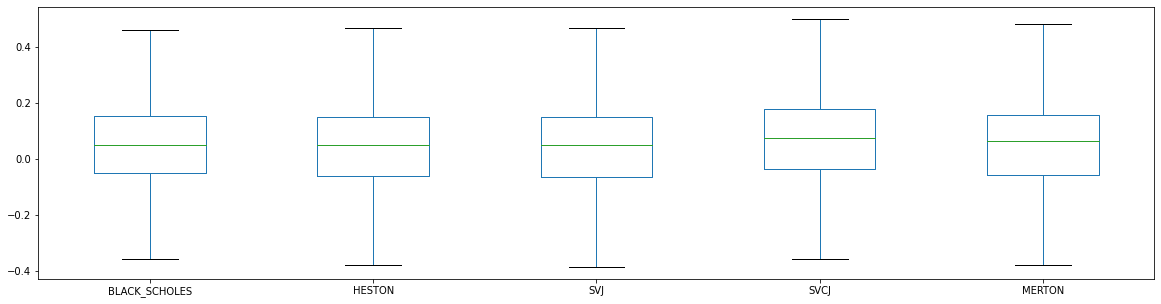

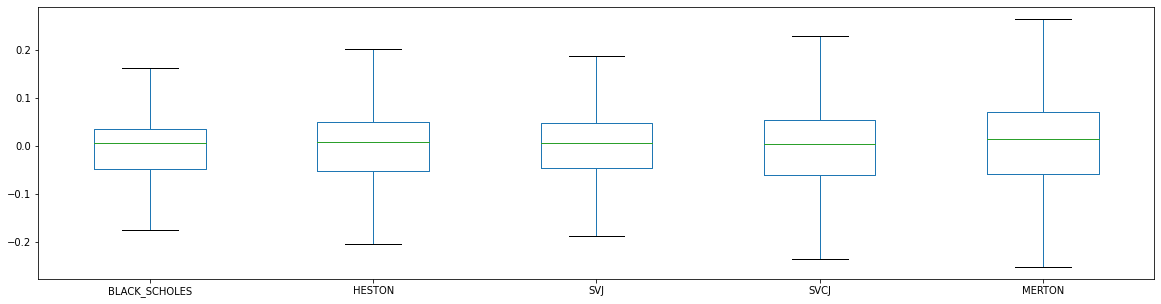

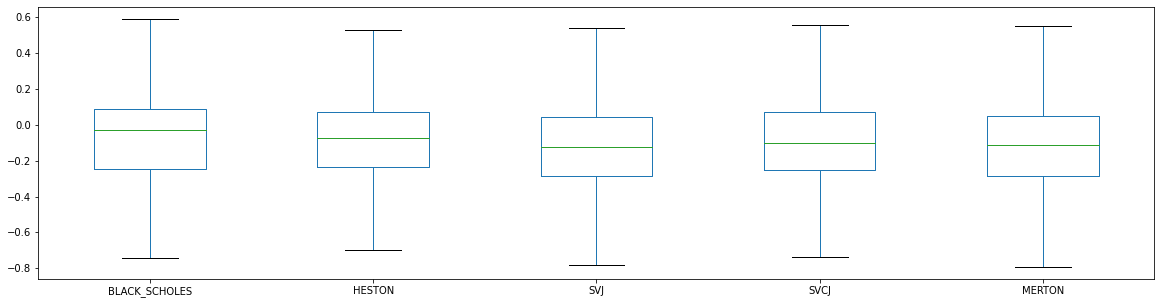

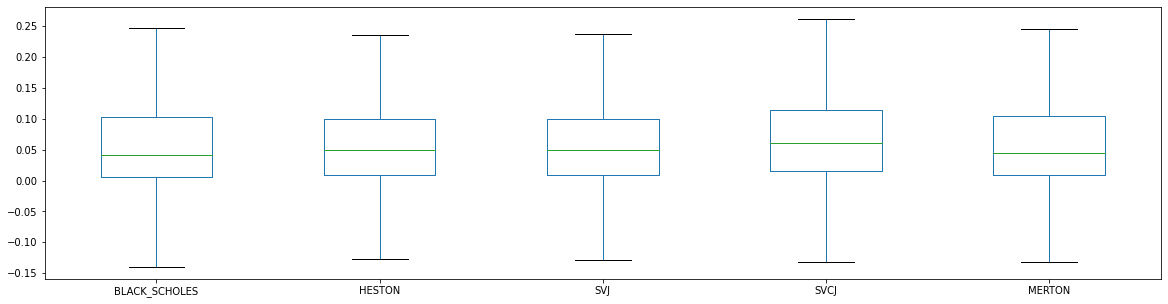

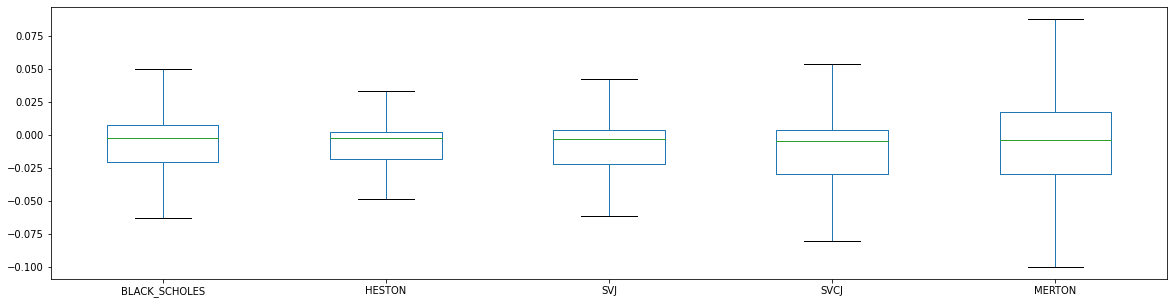

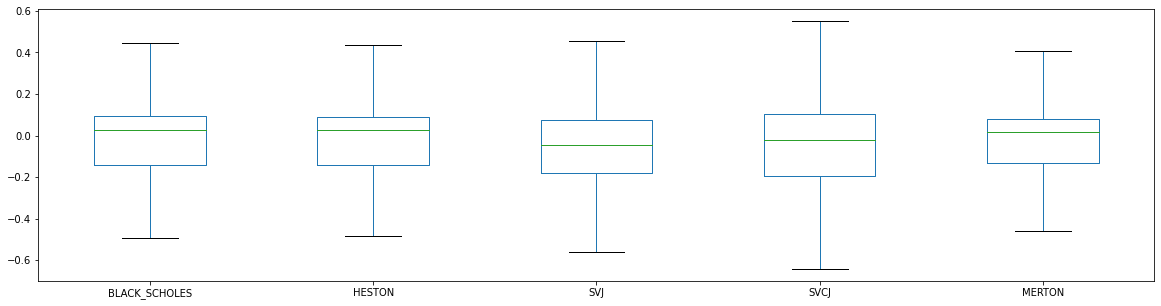

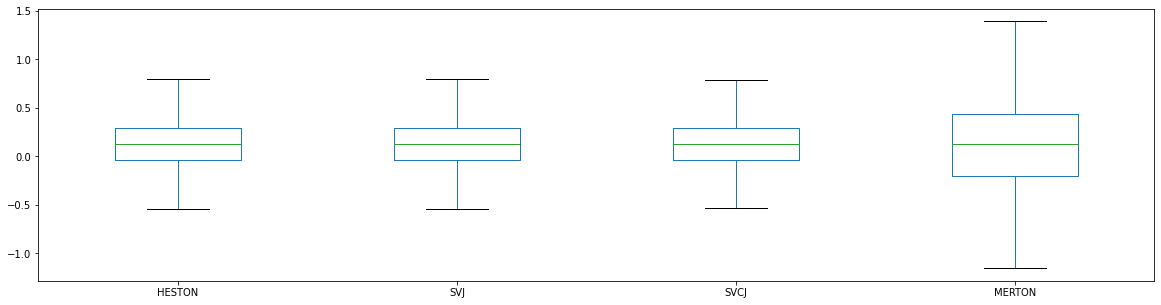

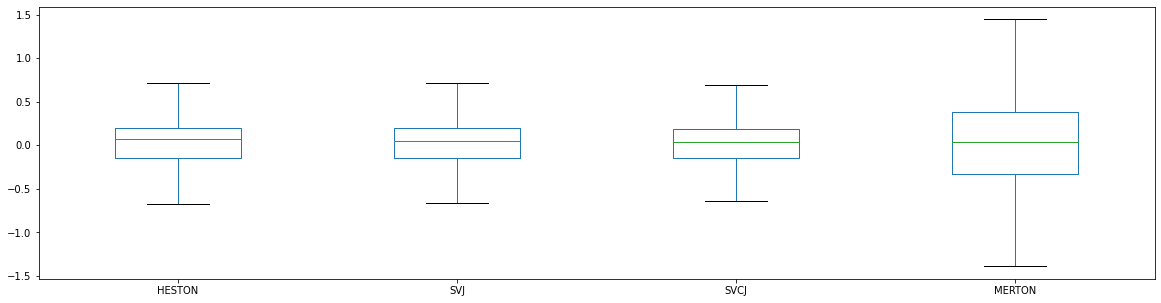

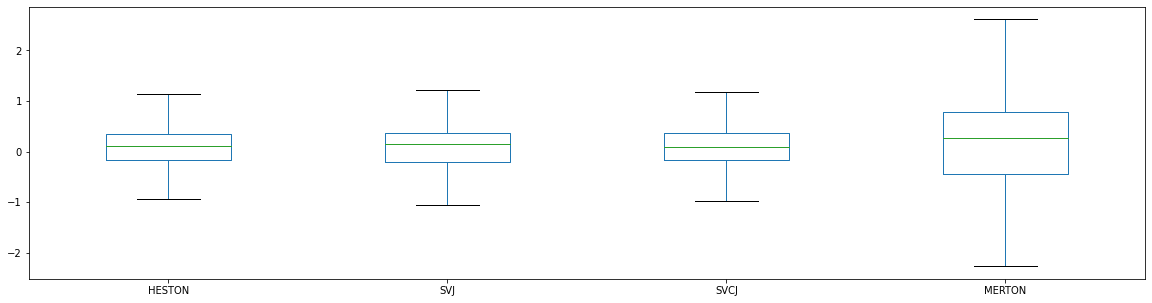

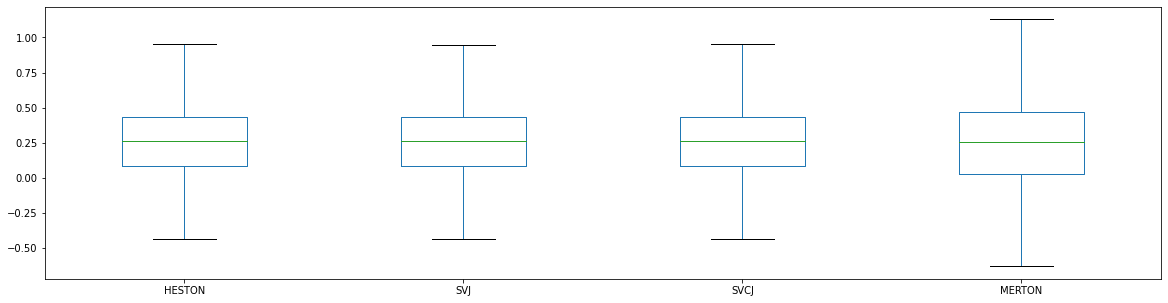

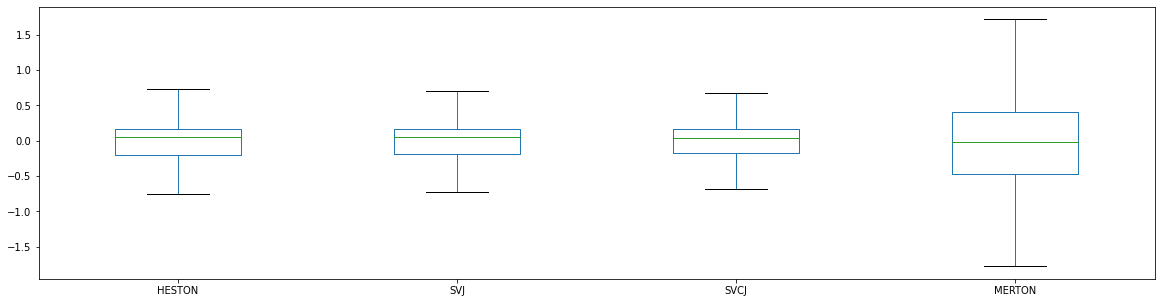

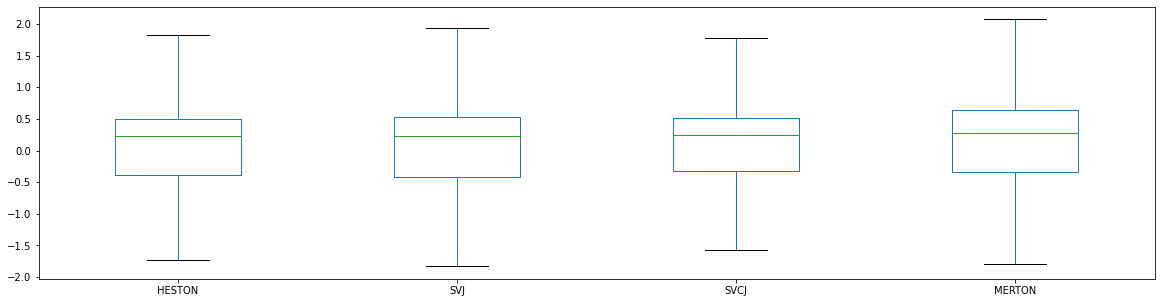

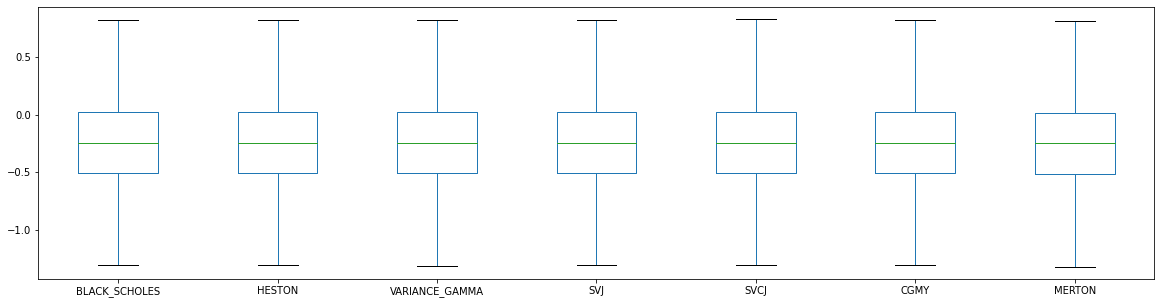

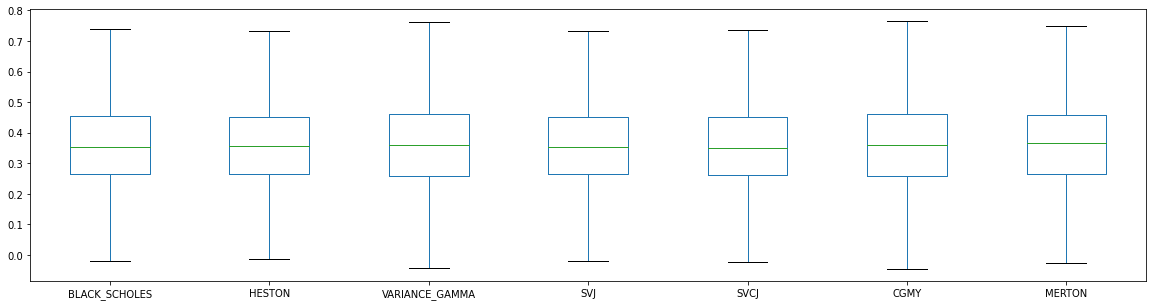

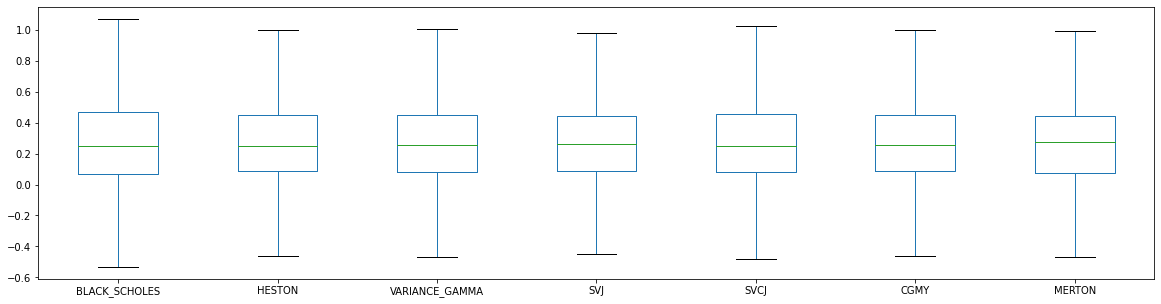

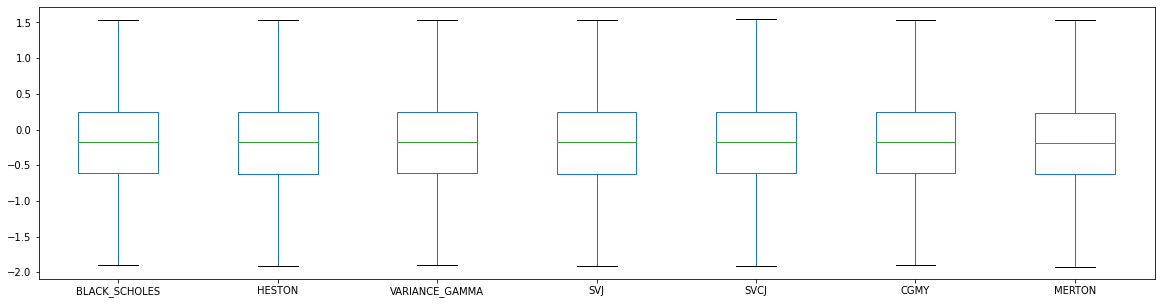

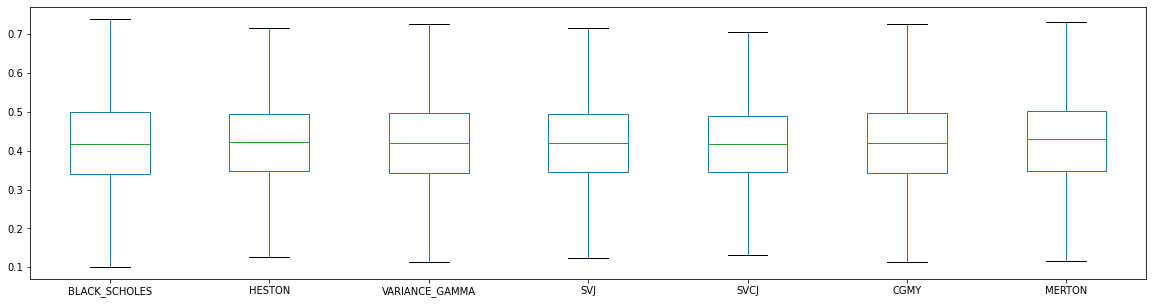

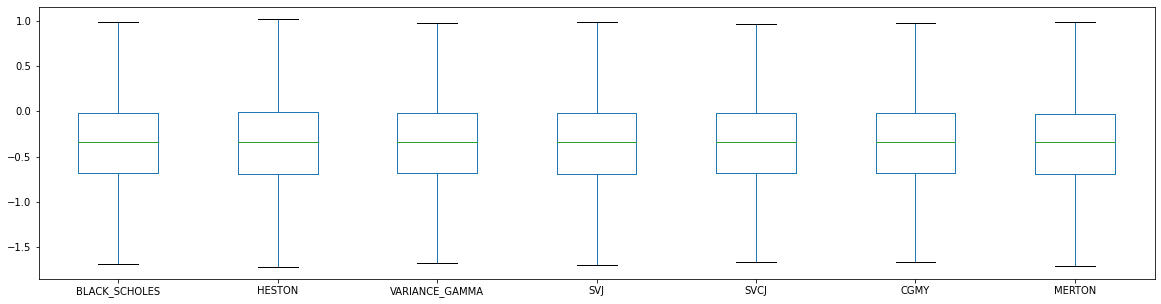

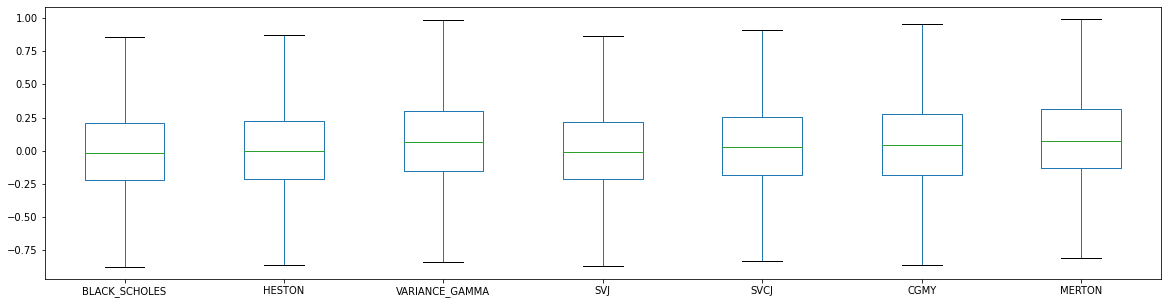

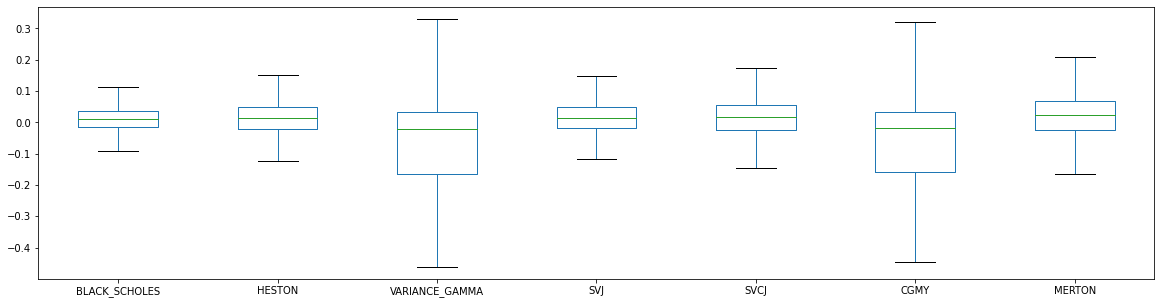

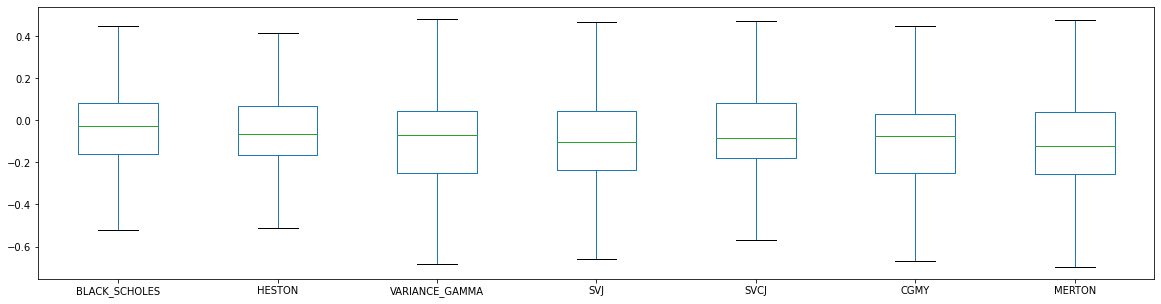

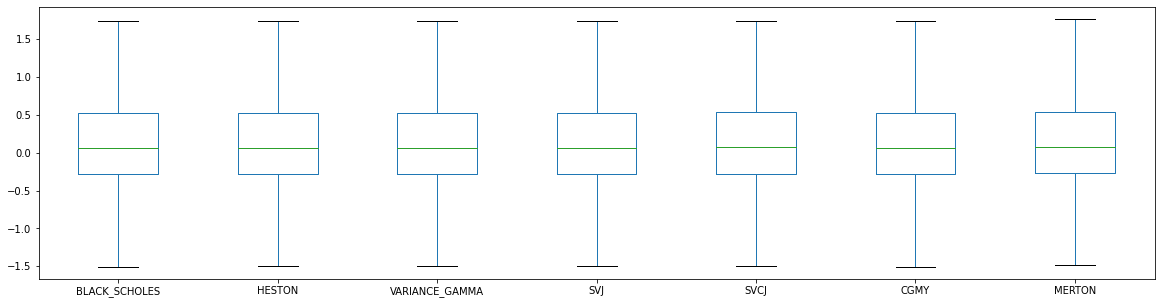

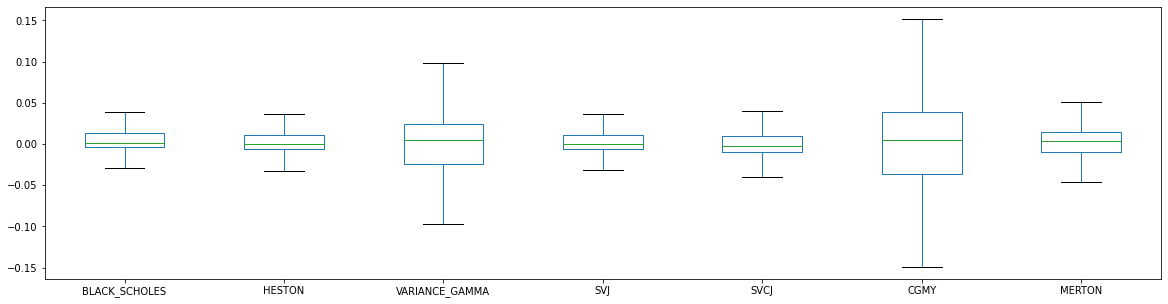

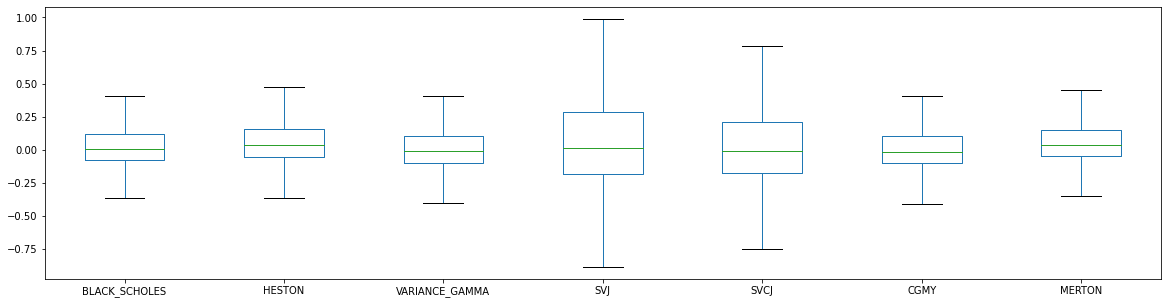

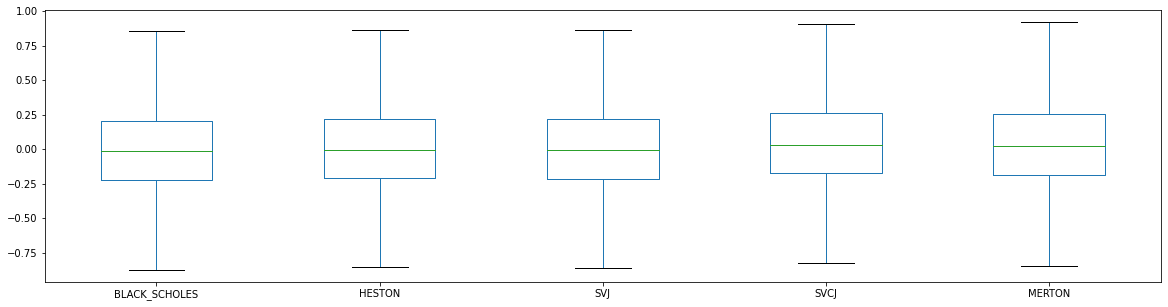

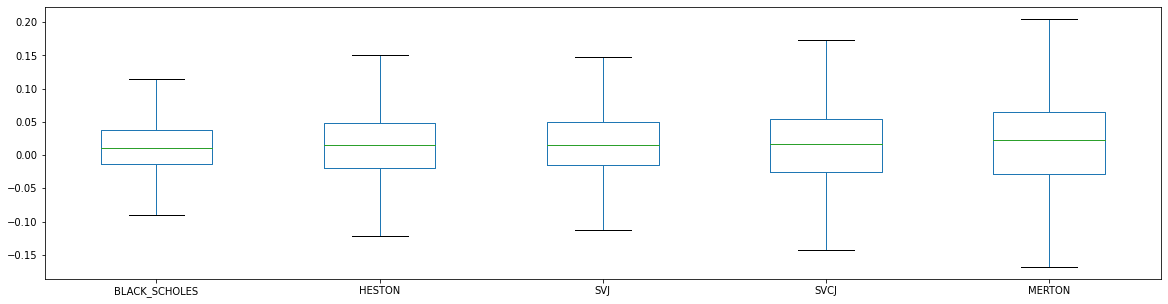

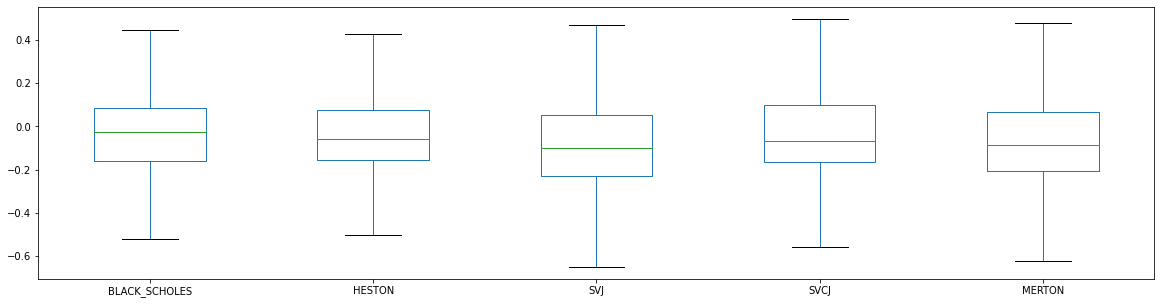

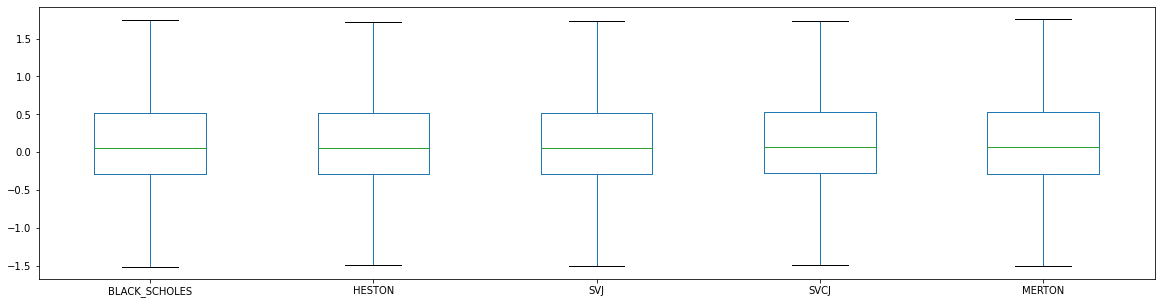

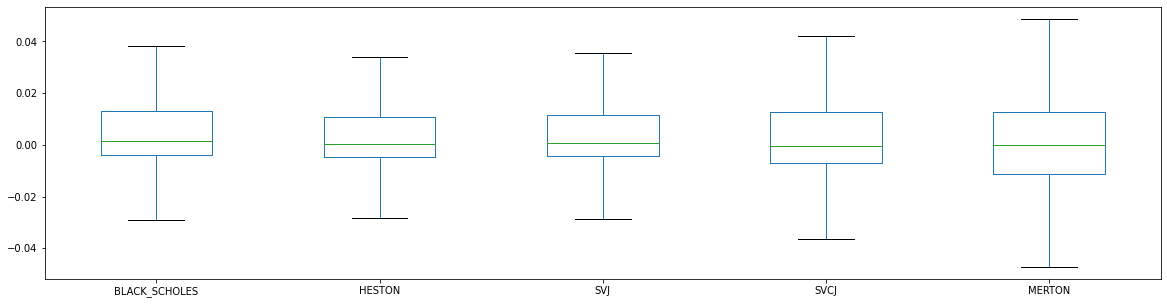

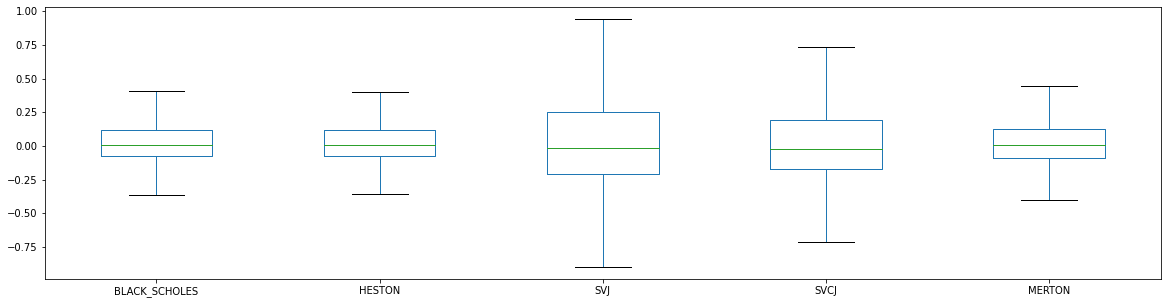

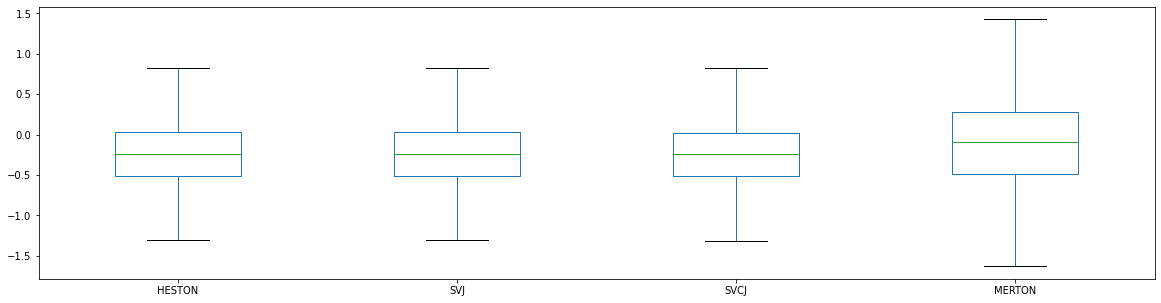

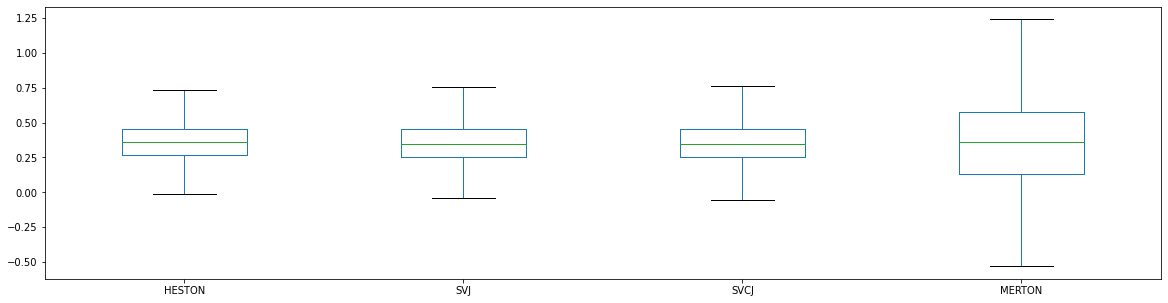

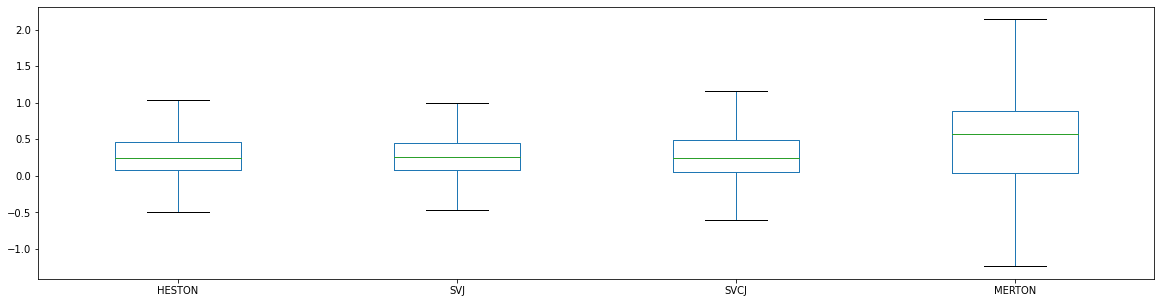

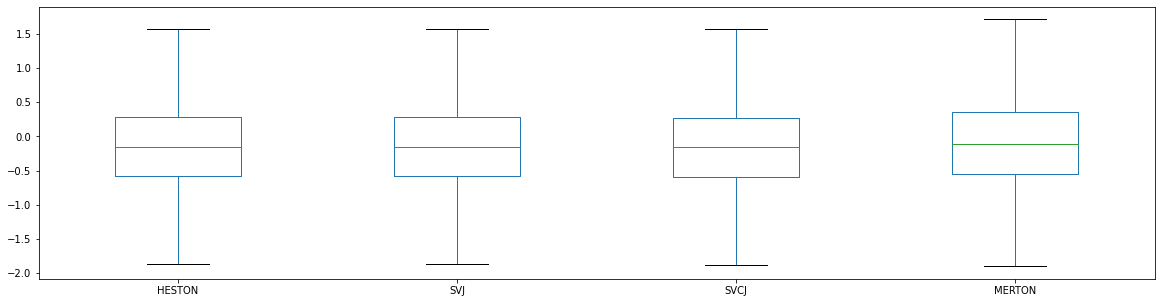

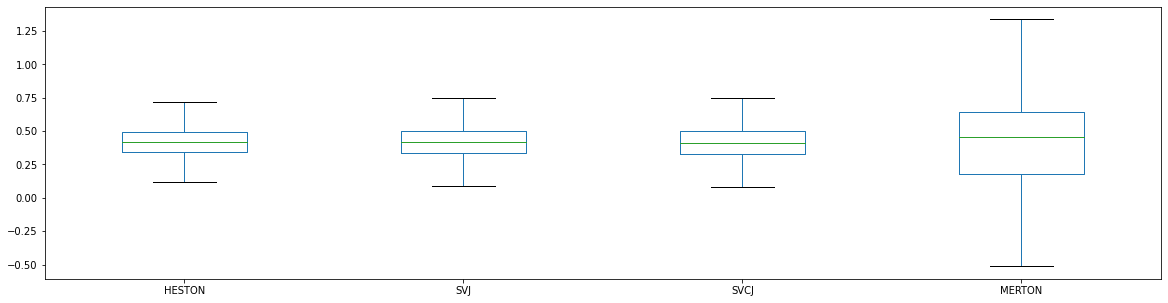

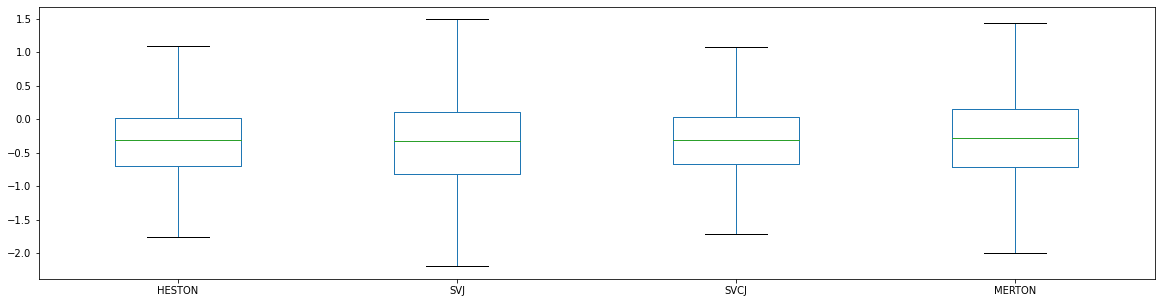

In [35]:
options = [
    ('BULLISH', 252.20, 30, 4088),
    ('CALM', 1008.68, 30, 8367),
    ('COVID', 521.33, 30, 9804),
    ('BULLISH', 456.07, 90, 4088),
    ('CALM', 1605.15, 90, 8367),
    ('COVID', 1115.77, 90, 9804),
]

args = []

for paths in 'SVCJ', 'KDE':
    for hedge in 'DeltaHedge', 'DeltaGammaHedge', 'DeltaVegaHedge', 'MinimumVarianceHedge',:
        for period, price, maturity, strike in options:
            args.append((paths, models, hedge, period, strike, maturity, price))
            
for arg in tqdm(args):
    plot_hedge_boxplot(*arg)